In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
!python --version
# !pip list
!jupyter --version
# code --version
import platform
print(platform.system(), platform.release(), platform.version())


Python 3.10.2
Selected Jupyter core packages...
IPython          : 8.18.1
ipykernel        : 6.27.1
ipywidgets       : not installed
jupyter_client   : 8.6.0
jupyter_core     : 5.5.0
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : not installed
nbconvert        : not installed
nbformat         : 5.10.4
notebook         : not installed
qtconsole        : not installed
traitlets        : 5.14.0
Windows 10 10.0.26100


In [3]:
# DDoS_attack_data = pd.read_csv("data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
#Friday-WorkingHours-Afternoon-DDos.pcap_ISCX TCP-SYNC DATASET
chunksize = 100000
chunks = pd.read_csv("data/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv", chunksize=chunksize)

# Combine processed chunks into a single DataFrame
processed_chunks = []
for chunk in chunks:
    processed_chunks.append(chunk)
DDoS_attack_data = pd.concat(processed_chunks, ignore_index=True)

In [4]:
DDoS_attack_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
DDoS_attack_data.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [6]:
DDoS_attack_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225745 entries, 0 to 225744
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             225745 non-null  int64  
 1    Flow Duration                225745 non-null  int64  
 2    Total Fwd Packets            225745 non-null  int64  
 3    Total Backward Packets       225745 non-null  int64  
 4   Total Length of Fwd Packets   225745 non-null  int64  
 5    Total Length of Bwd Packets  225745 non-null  int64  
 6    Fwd Packet Length Max        225745 non-null  int64  
 7    Fwd Packet Length Min        225745 non-null  int64  
 8    Fwd Packet Length Mean       225745 non-null  float64
 9    Fwd Packet Length Std        225745 non-null  float64
 10  Bwd Packet Length Max         225745 non-null  int64  
 11   Bwd Packet Length Min        225745 non-null  int64  
 12   Bwd Packet Length Mean       225745 non-nul

In [7]:
DDoS_attack_data.shape

(225745, 79)

In [8]:
#DDoS_attack_data["Label"].unique()

DDoS_attack_data = DDoS_attack_data.drop_duplicates()

# Pre-Processing

In [9]:
DDoS_attack_data.columns = DDoS_attack_data.columns.str.strip()

In [10]:

DDoS_attack_data.isna().sum().sum()

list(DDoS_attack_data.columns[DDoS_attack_data.isna().sum() > 0])

DDoS_attack_data = DDoS_attack_data.dropna()

In [11]:
# List of columns to drop
columns_to_drop = [
    'Unnamed: 0',
    'Flow ID',
    'Src IP','Source IP',
    'Dst IP',
    'Source Port', 
    'Destination IP',
    # 'Protocol', 
    'Timestamp', 
    # 'SimillarHTTP',
    # 'Inbound',
    
]

# Check for columns that exist in the dataset and drop them
columns_to_remove = list(set(columns_to_drop).intersection(set(DDoS_attack_data.columns)))
DDoS_attack_data = DDoS_attack_data.drop(columns=columns_to_remove, errors='ignore')

# Display the first few rows of the updated DataFrame
DDoS_attack_data.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [12]:
def clean_label(x):
    if x == "BENIGN":
        return 0
    else:
        return 1
        
DDoS_attack_data["Label_cleaned"] =  DDoS_attack_data["Label"].apply(clean_label)

DDoS_attack_data = DDoS_attack_data.drop(columns = ["Destination Port","Label"])



In [13]:
import pandas as pd
import numpy as np  # Import NumPy directly

# Function to identify and remove correlated features
def remove_correlated_features(dataset, threshold=0.8):
    # Compute the correlation matrix
    corr_matrix = dataset.corr().abs()
    
    # Create a mask to identify the upper triangle of the matrix
    upper_tri = corr_matrix.where(
        ~np.tril(np.ones(corr_matrix.shape)).astype(bool)
    )
    
    # Find the indices of columns to drop
    to_drop = [
        column for column in upper_tri.columns
        if any(upper_tri[column] > threshold)
    ]
    
    # Drop the correlated columns
    dataset_cleaned = dataset.drop(columns=to_drop)
    
    return dataset_cleaned, to_drop

# Example usage
# Assuming `DDoS_attack_data` is your DataFrame
threshold = 0.8  # Set the threshold
DDoS_attack_data, removed_features = remove_correlated_features(DDoS_attack_data, threshold)

# Output the results
print("Removed Correlated Features:", removed_features)
# print("Data Frame after Removing Correlated Features:")
# print(DDoS_attack_data.head())


Removed Correlated Features: ['Total Backward Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s', 'Max Packet Length', 'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance', 'SYN Flag Count', 'ECE Flag Count', 'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size', 'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes', 'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'act_data_pkt_fwd', 'Active Max', 'Active Min', 'Idle Mean', 'Idle Max', 'Idle Min']


In [14]:

# Select only numeric columns for the check
numeric_cols = DDoS_attack_data.select_dtypes(include=[np.number])

# Check for infinite values in numeric columns
inf_values_count = np.isinf(numeric_cols).sum().sum()
print(f"Number of infinite values in the numeric columns: {inf_values_count}")

# If there are infinite values, replace them with NaN
DDoS_attack_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check for missing values
missing_values_count = DDoS_attack_data.isnull().sum().sum()
print(f"Number of missing values: {missing_values_count}")


Number of infinite values in the numeric columns: 52
Number of missing values: 52


In [15]:


# Filter out rows with infinities
DDoS_attack_data = DDoS_attack_data[~np.isinf(numeric_cols).any(axis=1)]

# Remove columns with a single unique value
DDoS_attack_data = DDoS_attack_data.loc[:, DDoS_attack_data.nunique() > 1]

# Display the head of the cleaned dataset
DDoS_attack_data.head()


,Flow Duration,Total Fwd Packets,Total Length of Fwd Packets,Fwd Packet Length Min,Bwd Packet Length Max,Bwd Packet Length Min,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Min,...,ACK Flag Count,URG Flag Count,Down/Up Ratio,Init_Win_bytes_forward,Init_Win_bytes_backward,min_seg_size_forward,Active Mean,Active Std,Idle Std,Label_cleaned
0,3,2,12,6,0,0,4.000000e+06,666666.66670,3.0,3,...,1,0,0,33,-1,20,0.0,0.0,0.0,0
1,109,1,6,6,6,6,1.100917e+05,18348.62385,109.0,109,...,1,1,1,29,256,20,0.0,0.0,0.0,0
2,52,1,6,6,6,6,2.307692e+05,38461.53846,52.0,52,...,1,1,1,29,256,20,0.0,0.0,0.0,0
3,34,1,6,6,6,6,3.529412e+05,58823.52941,34.0,34,...,1,1,1,31,329,20,0.0,0.0,0.0,0
4,3,2,12,6,0,0,4.000000e+06,666666.66670,3.0,3,...,1,0,0,32,-1,20,0.0,0.0,0.0,0


In [16]:
# Filter benign and DDoS traffic
benign_df = DDoS_attack_data[DDoS_attack_data["Label_cleaned"] == 0]
DDoS_df = DDoS_attack_data[DDoS_attack_data["Label_cleaned"] == 1]

# Select a subset of 1000 rows from each
benign_df = benign_df.head(3500)
DDoS_df = DDoS_df.head(3500)

# Save benign traffic to CSV
benign_csv_path = "data/benign.csv"  # Specify the path
benign_df.to_csv(benign_csv_path, index=False)  # Save to CSV without index

# Combine the benign and DDoS data
DDoS_attack_data = pd.concat([benign_df, DDoS_df], axis=0)


In [17]:
DDoS_attack_data = DDoS_attack_data.sample(frac=1, random_state=42).reset_index(drop=True)


In [18]:
# label_encoder = LabelEncoder()
# DDoS_attack_data["Label_cleaned"] = label_encoder.fit_transform(DDoS_attack_data["Label_cleaned"])



In [19]:


DDoS_attack_data = DDoS_attack_data.sample(frac=1, random_state=42).reset_index(drop=True)

DDoS_attack_data = DDoS_attack_data.loc[:, DDoS_attack_data.nunique() > 1]


# Features analysis of the dataset to make sure it links to HTTP flood


In [20]:
DDoS_attack_data.columns

Index(['Flow Duration', 'Total Fwd Packets', 'Total Length of Fwd Packets',
       'Fwd Packet Length Min', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Min', 'Fwd IAT Min', 'Bwd IAT Total',
       'Bwd IAT Mean', 'Fwd PSH Flags', 'Bwd Packets/s', 'Min Packet Length',
       'FIN Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'Down/Up Ratio', 'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active Mean', 'Active Std', 'Idle Std',
       'Label_cleaned'],
      dtype='object')

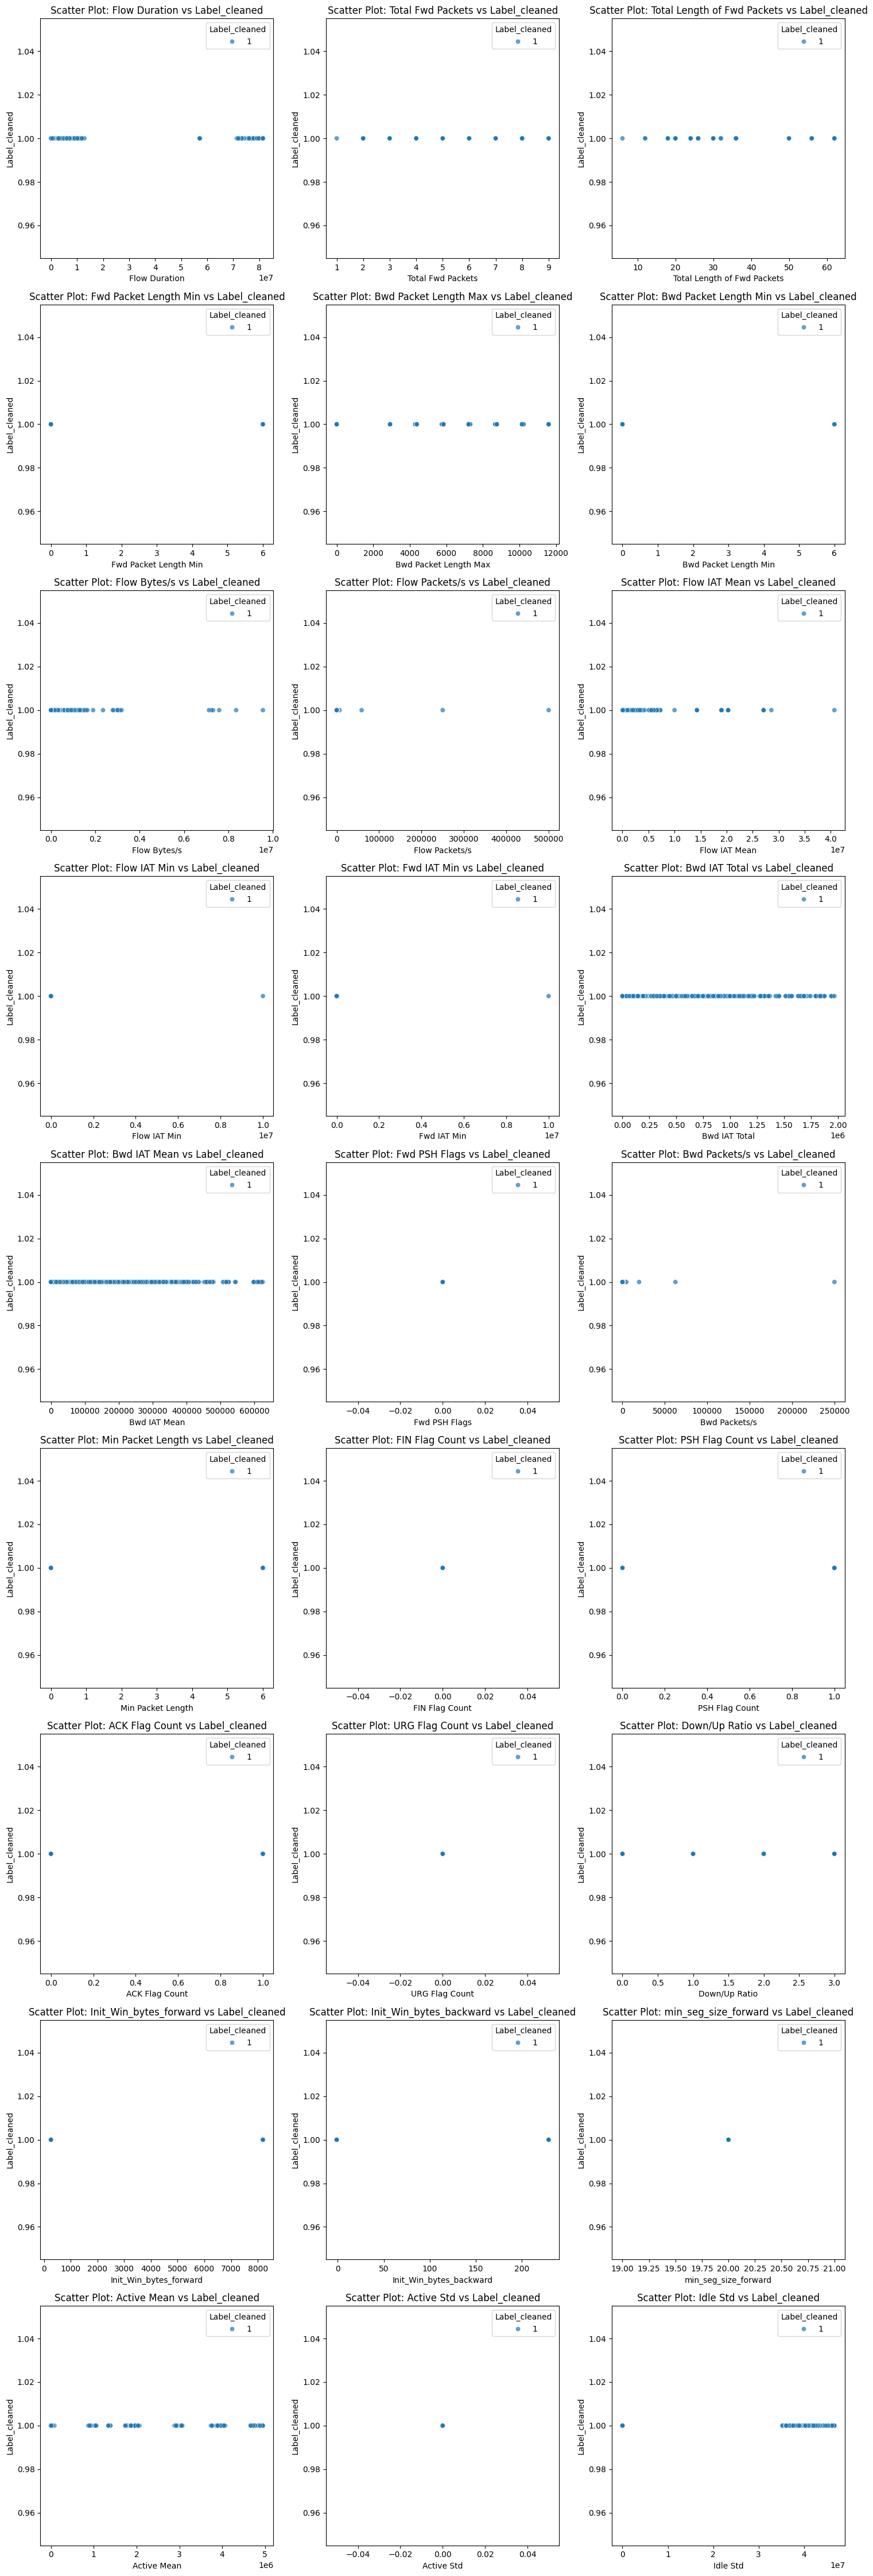

In [21]:
data = DDoS_attack_data

# Filter for attack data (Label_cleaned == 1 for attacks)
attack_data = data[data["Label_cleaned"] == 1]

# Scatter plot for all features
def plot_scatter_for_features(data, target_column):
    features = [col for col in data.columns if col != target_column]
    rows = len(features) // 3 + (1 if len(features) % 3 != 0 else 0)

    plt.figure(figsize=(15, rows * 5))
    for i, feature in enumerate(features, 1):
        plt.subplot(rows, 3, i)
        sns.scatterplot(data=data, x=feature, y=target_column, hue=target_column, alpha=0.7)
        plt.title(f"Scatter Plot: {feature} vs {target_column}")
        plt.xlabel(feature)
        plt.ylabel(target_column)
        plt.tight_layout()

# Plot scatter plots for all features
plot_scatter_for_features(attack_data, "Label_cleaned")
plt.show()

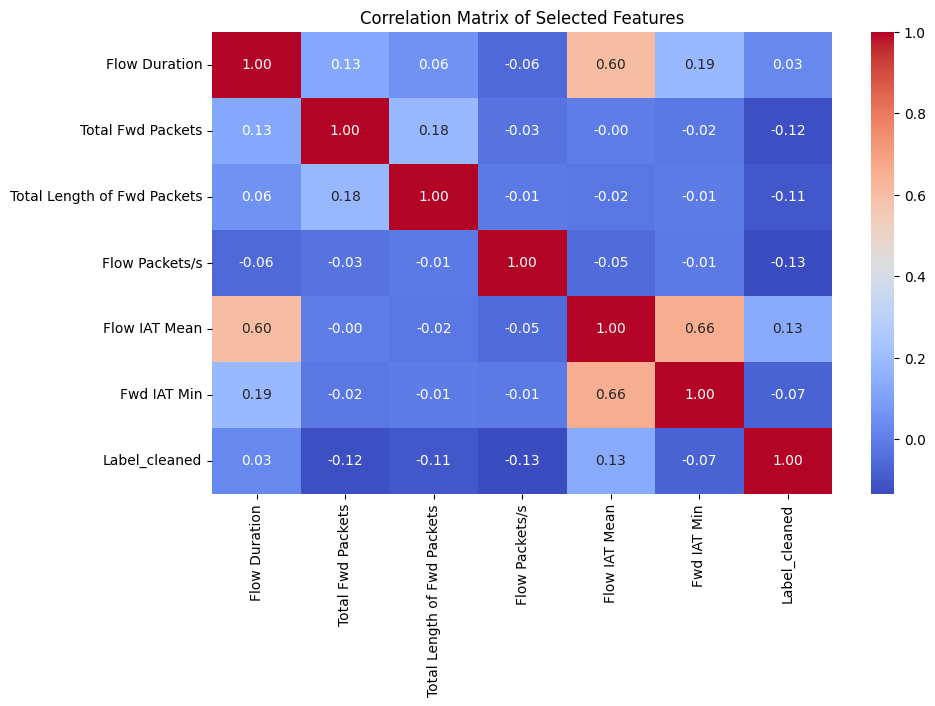

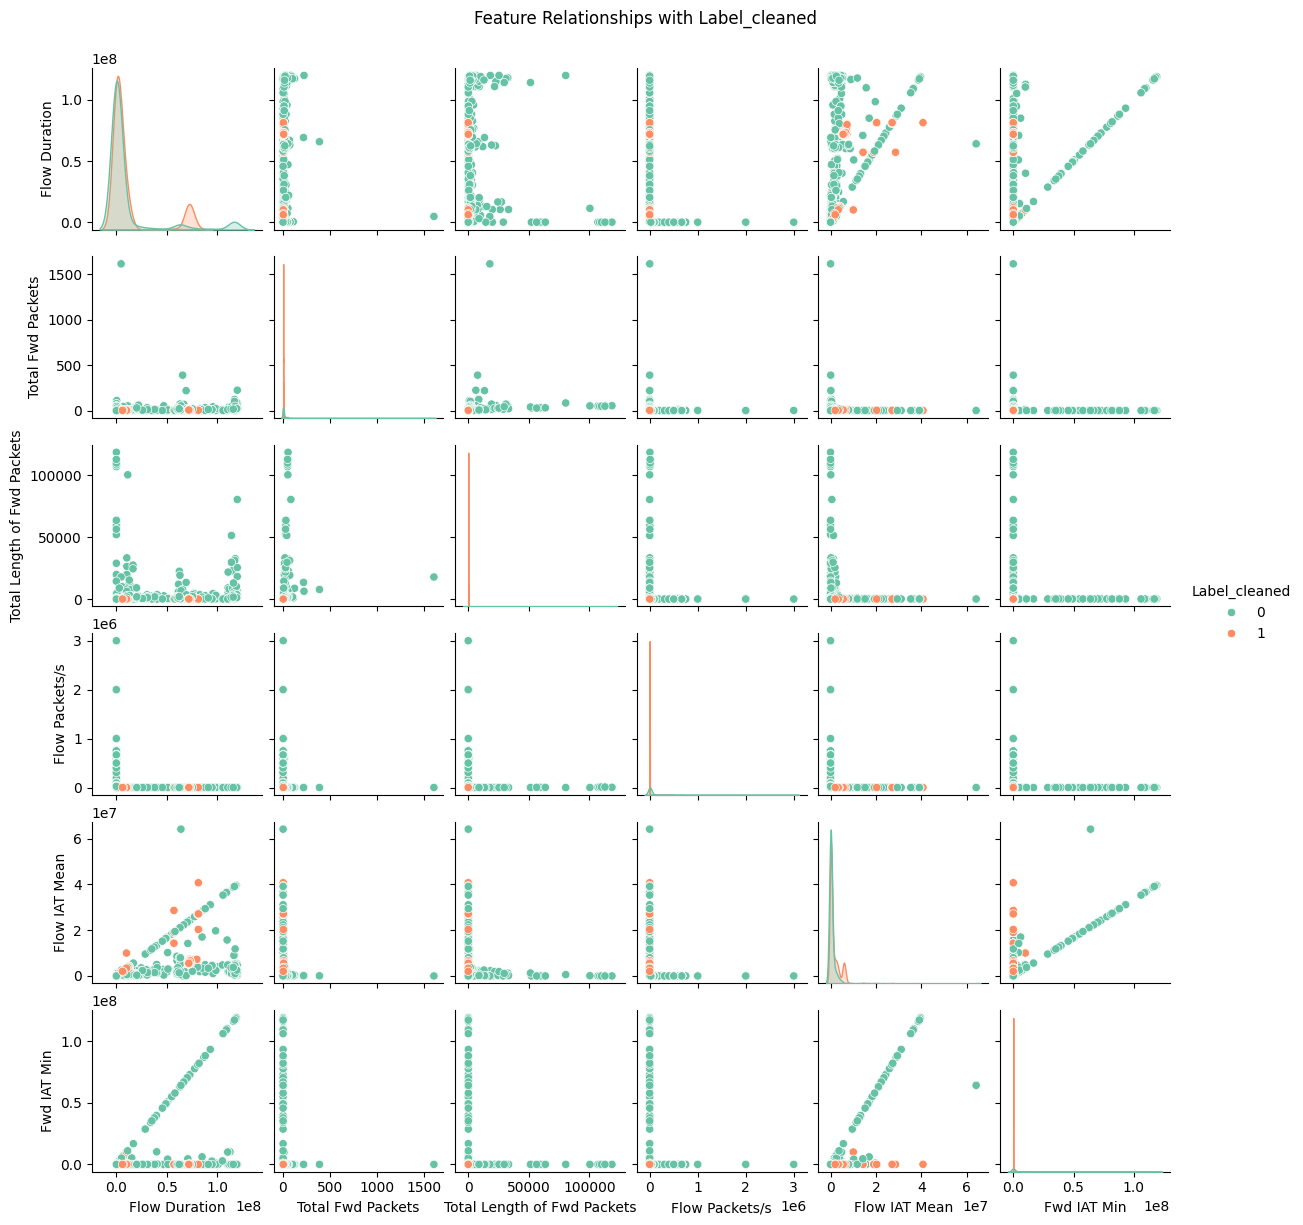

In [22]:
# Corrected list of features to analyze
features_to_analyze = [
    "Flow Duration",
    "Total Fwd Packets",
    "Total Length of Fwd Packets",
    "Flow Packets/s",
    "Flow IAT Mean",
    "Fwd IAT Min",
    "Label_cleaned",
]

# Filter the data to include only the features to analyze
filtered_data = DDoS_attack_data[features_to_analyze]

# 1. Correlation Matrix
plt.figure(figsize=(10, 6))
correlation_matrix = filtered_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Selected Features")
plt.show()

# 2. Pairplot (Scatter Plots for All Features with Label)
sns.pairplot(filtered_data, hue="Label_cleaned", palette="Set2", diag_kind="kde", height=2)
plt.suptitle("Feature Relationships with Label_cleaned", y=1.02)
plt.show()


# Data Spliting

In [23]:
# Define feature (X) and target (Y) data
X = DDoS_attack_data.drop(columns=["Label_cleaned"]).values  # Feature data
Y = DDoS_attack_data["Label_cleaned"].values  # Target data

# Define split ratios
nb_train = int(len(DDoS_attack_data) * 0.6)  # 60% for training
nb_val = int(len(DDoS_attack_data) * 0.2)   # 20% for validation
nb_test = len(DDoS_attack_data) - nb_train - nb_val  # Remaining for testing

# Splitting the data
X_train = X[:nb_train]
Y_train = Y[:nb_train]

X_val = X[nb_train:nb_train + nb_val]
Y_val = Y[nb_train:nb_train + nb_val]

X_test = X[nb_train + nb_val:]
Y_test = Y[nb_train + nb_val:]


In [24]:
# print(DDoS_attack_data.columns)
# print(X)

print("Features shape:", X.shape)
print("Y shape:", Y.shape)

Features shape: (7000, 27)
Y shape: (7000,)


In [25]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to each non-numeric column
for column in DDoS_attack_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    DDoS_attack_data[column] = le.fit_transform(DDoS_attack_data[column])


In [26]:
std_scaler = StandardScaler()
scaled_features = std_scaler.fit_transform(X)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score

import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.svm import LinearSVC


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

 Traning using ML

# Random forest Classifier

In [28]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train_scaled, Y_train)


y_pred = rf.predict(X_test_scaled)
acc_def = accuracy_score(Y_test, y_pred)
print("Testing accuracy with pre-defined alogorithm: {}".format(np.round(acc_def,3)))

Testing accuracy with pre-defined alogorithm: 1.0


In [29]:
import pickle

 
with open('model/rf_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

print(f"Model saved as model/rf_model.pkl")

Model saved as model/rf_model.pkl


In [30]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the K-Fold cross-validator
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_results = cross_val_score(rf, X, Y, cv=kf)

# Print the results
print("Cross-validation scores:", cross_val_results)
print("Mean accuracy:", cross_val_results.mean())


Cross-validation scores: [1.         0.99857143 1.         0.99928571 0.99928571]
Mean accuracy: 0.9994285714285714


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       727
           1       1.00      1.00      1.00       673

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400

Confusion Matrix:
 [[727   0]
 [  0 673]]
Accuracy Score: 1.0


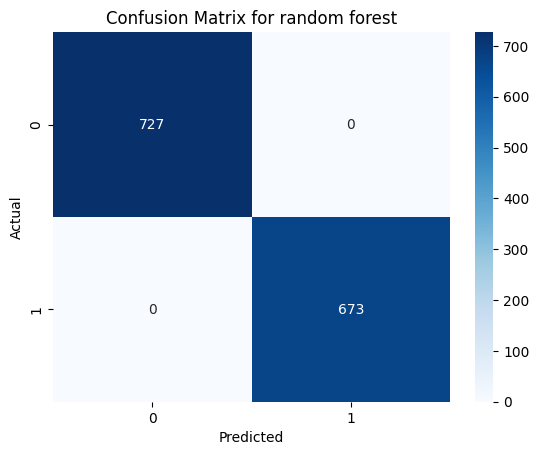

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score

print("Classification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))
print("Accuracy Score:", accuracy_score(Y_test, y_pred))

# Visualization: Confusion Matrix
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for random forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [32]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler

# pca = PCA(n_components = 5)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

# model = RandomForestClassifier(
#     #n_estimators=500,          # Number of trees
#     #max_depth=50,              # Limit tree depth
#     #min_samples_split=30,       # Minimum samples to split a node
#     #min_samples_leaf=15,        # Minimum samples in a leaf node
#     #max_features='sqrt',       # Consider sqrt of total features for each split
#     random_state=42
# )
# model.fit(X_train_pca, Y_train)

# y_pred_pca = model.predict(X_test_pca)

# acc_def = accuracy_score(Y_test, y_pred_pca)
# print("Testing accuracy with pre-defined alogorithm: {}".format(np.round(acc_def,3)))

# KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model =KNeighborsClassifier()
KNN_model.fit(X_train_scaled, Y_train)


KNeighborsClassifier()

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       727
           1       0.99      1.00      1.00       673

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400

Accuracy Score: 0.9971428571428571
Confusion Matrix:


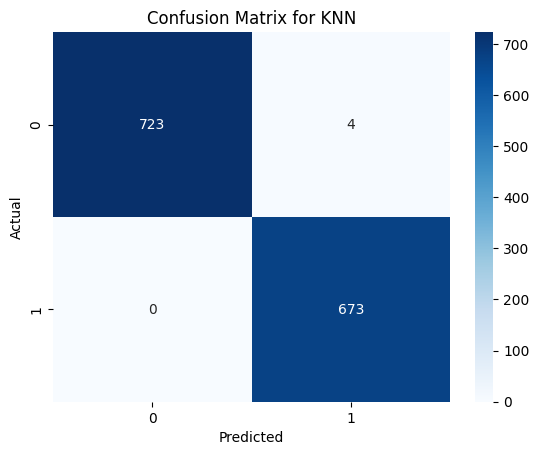

In [60]:

print("SVM Classification Report:")
knn_predictions = KNN_model.predict(X_test_scaled)
print(classification_report(Y_test, knn_predictions))



print("Accuracy Score:", accuracy_score(Y_test, knn_predictions))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(Y_test, knn_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()





# SVM

In [35]:

svm_model =LinearSVC()#SVC(class_weight='balanced')
svm_model.fit(X_train_scaled, Y_train)

LinearSVC()

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       727
           1       0.93      1.00      0.96       673

    accuracy                           0.96      1400
   macro avg       0.96      0.96      0.96      1400
weighted avg       0.97      0.96      0.96      1400

Accuracy Score: 0.9635714285714285
Confusion Matrix:


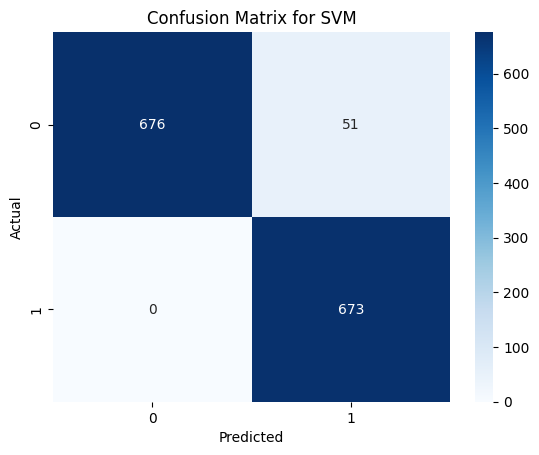

In [61]:

print("SVM Classification Report:")
svm_predictions = svm_model.predict(X_test_scaled)
print(classification_report(Y_test, svm_predictions))



print("Accuracy Score:", accuracy_score(Y_test, svm_predictions))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(Y_test, svm_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




# Logestic Regression

In [37]:
from sklearn.linear_model import LogisticRegression


# Initialize the Logistic Regression model with hyperparameter constraints
log_reg_model = LogisticRegression(
    penalty='l2',   # Regularization type (l1 or l2)
    C=1.0,          # Inverse of regularization strength (lower values mean stronger regularization)
    solver='lbfgs', # Optimization algorithm (lbfgs, saga, etc.)
    max_iter=1000   # Maximum number of iterations
)

# Train the model
log_reg_model.fit(X_train_scaled, Y_train)

# Make predictions
log_reg_predictions = log_reg_model.predict(X_test_scaled)




Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.96       727
           1       0.92      1.00      0.96       673

    accuracy                           0.96      1400
   macro avg       0.96      0.96      0.96      1400
weighted avg       0.96      0.96      0.96      1400

Accuracy Score: 0.9557142857142857
Confusion Matrix:


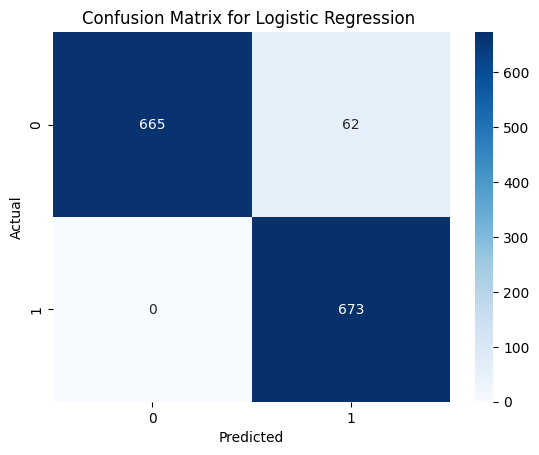

ROC-AUC Score: 0.9954932951268316


In [62]:
# Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(Y_test, log_reg_predictions))

# Accuracy Score
print("Accuracy Score:", accuracy_score(Y_test, log_reg_predictions))
 
# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(Y_test, log_reg_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Logistic Regression ")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Optional: ROC-AUC Score
log_reg_probs = log_reg_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(Y_test, log_reg_probs)
print("ROC-AUC Score:", roc_auc)

In [39]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train_scaled, Y_train)




c:\Users\phani\AppData\Local\Programs\Python\Python310\lib\site-packages\dask\dataframe\__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
c:\Users\phani\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 2105, number of negative: 2095
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3734
[LightGBM] [Info] Number of data points in the train set: 4200, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501190 -> initscore=0.004762
[LightGBM] [Info] Start training from score 0.004762
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

c:\Users\phani\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier(random_state=42)

LGB Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       727
           1       1.00      1.00      1.00       673

    accuracy                           1.00      1400
   macro avg       1.00      1.00      1.00      1400
weighted avg       1.00      1.00      1.00      1400

Accuracy Score: 1.0
Confusion Matrix:


c:\Users\phani\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


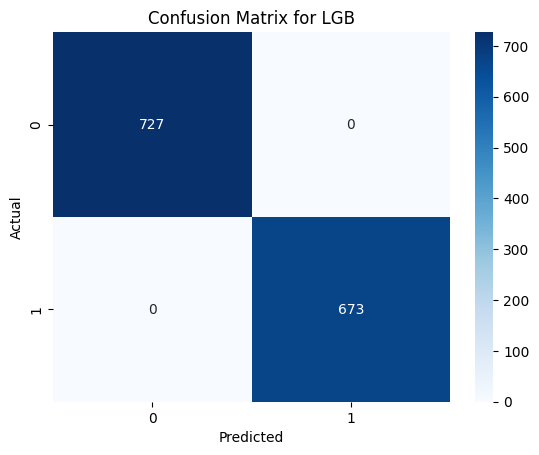

In [63]:
print("LGB Classification Report:")
lgb_predictions = lgb_model.predict(X_test_scaled)
print(classification_report(Y_test, lgb_predictions))

print("Accuracy Score:", accuracy_score(Y_test, lgb_predictions))

# Confusion Matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(Y_test, lgb_predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for LGB")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Deep Learning MOdels

# Conventional Neural Networks

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam


# Step 4: Build the CNN cnn_Model
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),  # Convolutional layer
    MaxPooling1D(pool_size=2),  # Max pooling layer
    Dropout(0.25),  # Prevent overfitting
    Conv1D(filters=64, kernel_size=3, activation='relu'),  # Second convolutional layer
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    Flatten(),  # Flatten the 3D output to 1D
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 5: Compile the cnn_Model
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the cnn_Model
history = cnn_model.fit(X_train_scaled[..., np.newaxis], Y_train, validation_split=0.2, epochs=10, batch_size=64, verbose=1)

# Step 7: Evaluate the cnn_Model
loss, accuracy = cnn_model.evaluate(X_test_scaled[..., np.newaxis], Y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.2f}")

# Predictions
Y_pred_probs = cnn_model.predict(X_test_scaled[..., np.newaxis])  # Predicted probabilities
Y_pred = (Y_pred_probs > 0.5).astype("int32")  # Convert probabilities to binary predictions





Epoch 1/10


53/53 [==============================] - 4s 21ms/step - loss: 0.5174 - accuracy: 0.7926 - val_loss: 0.2554 - val_accuracy: 0.9083
Epoch 2/10
53/53 [==============================] - 1s 16ms/step - loss: 0.2154 - accuracy: 0.9298 - val_loss: 0.1421 - val_accuracy: 0.9583
Epoch 3/10
53/53 [==============================] - 1s 11ms/step - loss: 0.1504 - accuracy: 0.9515 - val_loss: 0.1380 - val_accuracy: 0.9560
Epoch 4/10
53/53 [==============================] - 1s 12ms/step - loss: 0.1347 - accuracy: 0.9539 - val_loss: 0.1057 - val_accuracy: 0.9607
Epoch 5/10
53/53 [==============================] - 1s 11ms/step - loss: 0.1227 - accuracy: 0.9551 - val_loss: 0.1171 - val_accuracy: 0.9571
Epoch 6/10
53/53 [==============================] - 1s 11ms/step - loss: 0.1163 - accuracy: 0.9613 - val_loss: 0.1022 - val_accuracy: 0.9607
Epoch 7/10
53/53 [==============================] - 1s 11ms/step - loss: 0.1086 - accuracy: 0.9625 - val_loss: 0.1052 - val_accuracy: 0.9619
Epoch 8/

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.79      0.88       727
           1       0.81      0.99      0.89       673

    accuracy                           0.89      1400
   macro avg       0.90      0.89      0.89      1400
weighted avg       0.91      0.89      0.88      1400



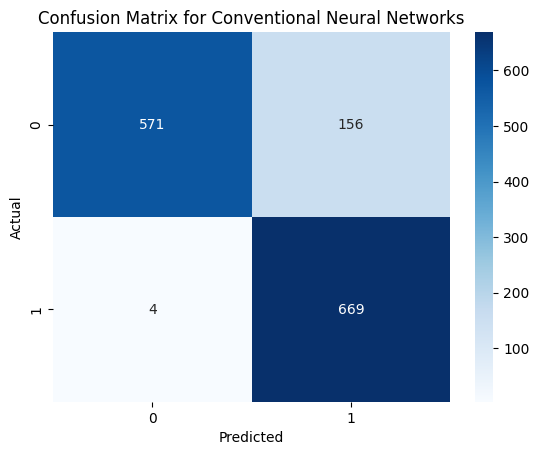

In [65]:
# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Conventional Neural Networks")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
import numpy as np

# Step 4: Build the LSTM Model
lstm_model = Sequential([
    LSTM(64, input_shape=(X_train_scaled.shape[1], 1), return_sequences=True, activation='relu'),
    Dropout(0.25),
    LSTM(32, return_sequences=False, activation='relu'),
    Dropout(0.25),
    Dense(64, activation='relu'),  # Fully connected layer
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Step 5: Compile the LSTM Model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Train the LSTM Model
history = lstm_model.fit(X_train_scaled[..., np.newaxis], Y_train, validation_split=0.2, epochs=10, batch_size=64, verbose=1)

# Step 7: Evaluate the LSTM Model
loss, accuracy = lstm_model.evaluate(X_test_scaled[..., np.newaxis], Y_test, verbose=1)
print(f"Test Accuracy: {accuracy:.2f}")

# Predictions
Y_pred_probs = lstm_model.predict(X_test_scaled[..., np.newaxis])  # Predicted probabilities
Y_pred = (Y_pred_probs > 0.5).astype("int32")  # Convert probabilities to binary predictions


Epoch 1/10
53/53 [==============================] - 10s 70ms/step - loss: 0.6929 - accuracy: 0.5161 - val_loss: 0.6920 - val_accuracy: 0.4940
Epoch 2/10
53/53 [==============================] - 3s 51ms/step - loss: 0.6893 - accuracy: 0.5396 - val_loss: 0.6778 - val_accuracy: 0.5167
Epoch 3/10
53/53 [==============================] - 2s 46ms/step - loss: 0.5832 - accuracy: 0.6857 - val_loss: 0.3961 - val_accuracy: 0.8690
Epoch 4/10
53/53 [==============================] - 2s 42ms/step - loss: 0.4586 - accuracy: 0.7896 - val_loss: 0.4509 - val_accuracy: 0.7369
Epoch 5/10
53/53 [==============================] - 2s 45ms/step - loss: 0.3844 - accuracy: 0.8402 - val_loss: 0.4279 - val_accuracy: 0.8250
Epoch 6/10
53/53 [==============================] - 2s 41ms/step - loss: 0.3087 - accuracy: 0.8863 - val_loss: 0.3491 - val_accuracy: 0.8798
Epoch 7/10
53/53 [==============================] - 3s 48ms/step - loss: 0.3824 - accuracy: 0.8336 - val_loss: 0.7334 - val_accuracy: 0.5179
Epoch 8/10
5

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.79      0.88       727
           1       0.81      0.99      0.89       673

    accuracy                           0.89      1400
   macro avg       0.90      0.89      0.89      1400
weighted avg       0.91      0.89      0.88      1400



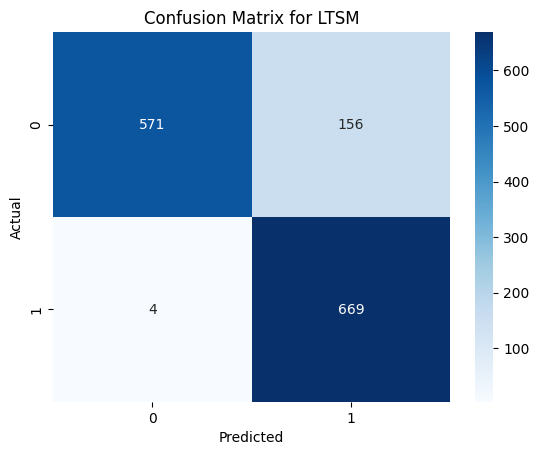

In [64]:
# Classification Report
print("Classification Report:")
print(classification_report(Y_test, Y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for LTSM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




Saving of the models

In [45]:
with open('model/KNN_model.pkl', 'wb') as file:
    pickle.dump(KNN_model, file)
print(f"Model saved as 'model/KNN_model.pkl'")

Model saved as 'model/KNN_model.pkl'


In [46]:
with open('model/svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)
print(f"Model saved as 'model/svm_model.pkl'")

Model saved as 'model/svm_model.pkl'


In [47]:
with open('model/log_reg_model.pkl', 'wb') as file:
    pickle.dump(log_reg_model, file)
    print(f"Model saved as 'model/log_reg_model.pkl'")

Model saved as 'model/log_reg_model.pkl'


In [48]:
with open("model/lgb_model.pkl", "wb") as file:
    pickle.dump(lgb_model, file)

print(f"Model saved as 'model/lgb_model.pkl' ")    

Model saved as 'model/lgb_model.pkl' 


In [49]:

with open("model/CNN_model.pkl", "wb") as file:
    pickle.dump(cnn_model, file)

print("Model saved as 'CNN_model.pkl'.")

Model saved as 'CNN_model.pkl'.


In [50]:


with open("model/LTSM_model.pkl", "wb") as file:
    pickle.dump(lstm_model, file)

print("Model saved as 'LTSM_model.pkl'.")

Model saved as 'LTSM_model.pkl'.


In [51]:
xval_data = pd.DataFrame(X_val, columns=DDoS_attack_data.drop(columns=["Label_cleaned"]).columns)
xval_data.to_csv("data/X_val.csv", index=False)

In [52]:
import os

validation_data = pd.DataFrame(X_val, columns=DDoS_attack_data.drop(columns=["Label_cleaned"]).columns)
validation_data["Label_cleaned"] = Y_val

# Ensure the 'data' folder exists
# os.makedirs("data", exist_ok=True)

# Save the validation data to CSV
validation_data.to_csv("data/validation.csv", index=False)

print("Validation data saved as 'data/validation.csv'")

Validation data saved as 'data/validation.csv'


c:\Users\phani\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\phani\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


44/44 [==============================] - 1s 11ms/step


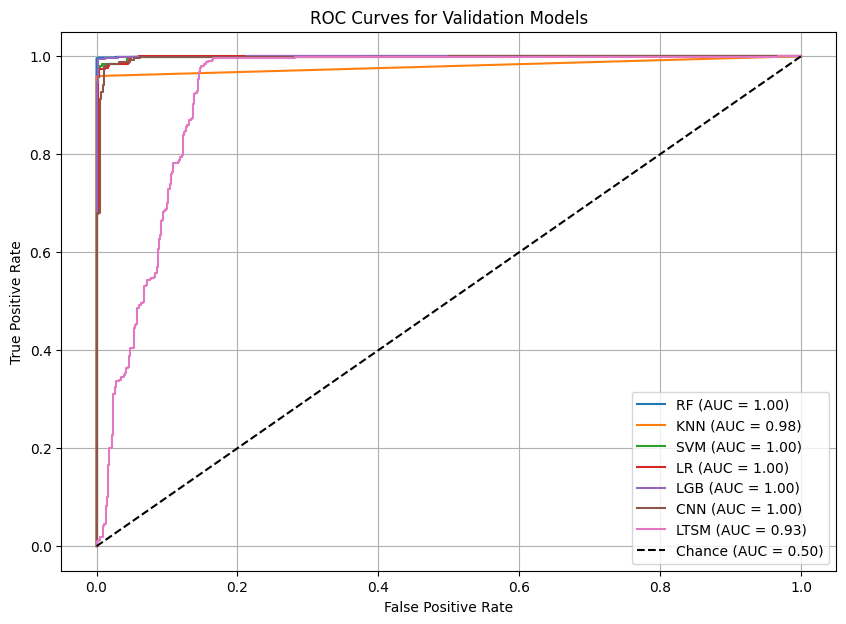

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
# Scale the validation data directly using MinMaxScaler
scaler = MinMaxScaler()
X_val_scaled = scaler.fit_transform(X_val)  # Scale X_val directly

# Load and evaluate models
model_paths = {
    "RF": "model/rf_model.pkl",
    "KNN":"model/KNN_model.pkl",
    "SVM": "model/svm_model.pkl",
    "LR": "model/log_reg_model.pkl",
    "LGB": "model/lgb_model.pkl",
    # DEEP LEARNING MODELS
    "CNN": "model/CNN_model.pkl",
    "LTSM": "model/LTSM_model.pkl"
}

results = []

plt.figure(figsize=(10, 7))
for model_name, model_path in model_paths.items():
    with open(model_path, 'rb') as file:
        model = pickle.load(file)

    # Predict probabilities and labels
    if hasattr(model, "decision_function"):  # For SVM or similar models
        y_probs = model.decision_function(X_val_scaled)
        y_preds = model.predict(X_val_scaled)
    elif hasattr(model, "predict_proba"):  # For models like Logistic Regression
        y_probs = model.predict_proba(X_val_scaled)[:, 1]
        y_preds = model.predict(X_val_scaled)
    elif hasattr(model, "predict"):  # For Keras Sequential or similar models
        y_probs = model.predict(X_val_scaled).ravel()  # Ensure 1D array
        y_preds = (y_probs > 0.5).astype(int)  # Threshold for binary classification
    else:
        raise AttributeError(f"{model_name} does not support prediction methods.")
    
    # Compute metrics
    roc_auc = roc_auc_score(Y_val, y_probs)
    accuracy = accuracy_score(Y_val, y_preds)
    f1 = f1_score(Y_val, y_preds)
    precision = precision_score(Y_val, y_preds)
    recall = recall_score(Y_val, y_preds)

    results.append({
        "Model": model_name,
        "AUC": roc_auc,
        "Accuracy": accuracy,
        "F1-Score": f1,
        "Precision": precision,
        "Recall": recall
    })

    # Compute and plot ROC curve
    fpr, tpr, _ = roc_curve(Y_val, y_probs)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Chance (AUC = 0.50)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Validation Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Display results in a tabular format
results_df = pd.DataFrame(results)
results_df.sort_values(by="AUC", ascending=False, inplace=True)  # Sort by AUC


In [54]:
results_df

,Model,AUC,Accuracy,F1-Score,Precision,Recall
0,RF,0.999878,0.882857,0.871875,1.000000,0.772853
4,LGB,0.999549,0.972857,0.972973,1.000000,0.947368
3,LR,0.998595,0.970714,0.972391,0.946265,1.000000
2,SVM,0.998505,0.975000,0.976303,0.954967,0.998615
5,CNN,0.996952,0.970714,0.972316,0.948617,0.997230
1,KNN,0.979762,0.977143,0.977401,0.997118,0.958449
6,LTSM,0.929114,0.901429,0.912548,0.841121,0.997230


c:\Users\phani\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



SHAP Analysis for RF:


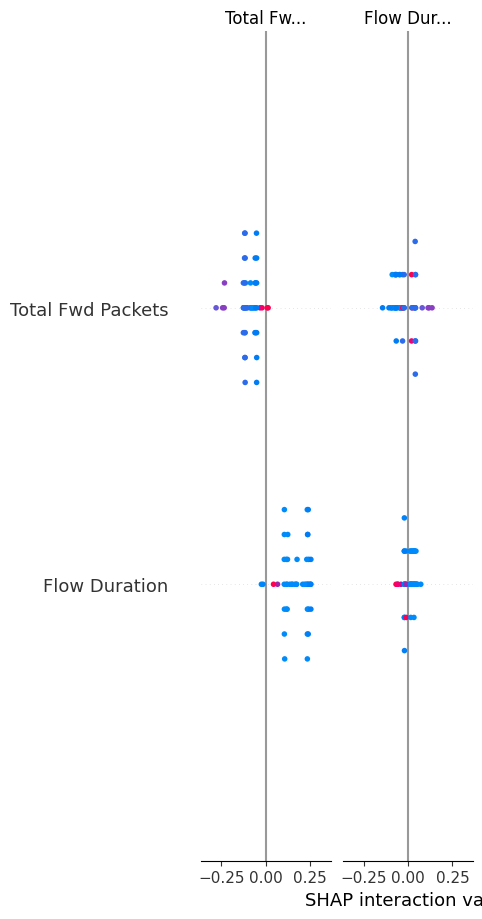


SHAP Analysis for KNN:


100%|██████████| 50/50 [02:23<00:00,  2.88s/it]


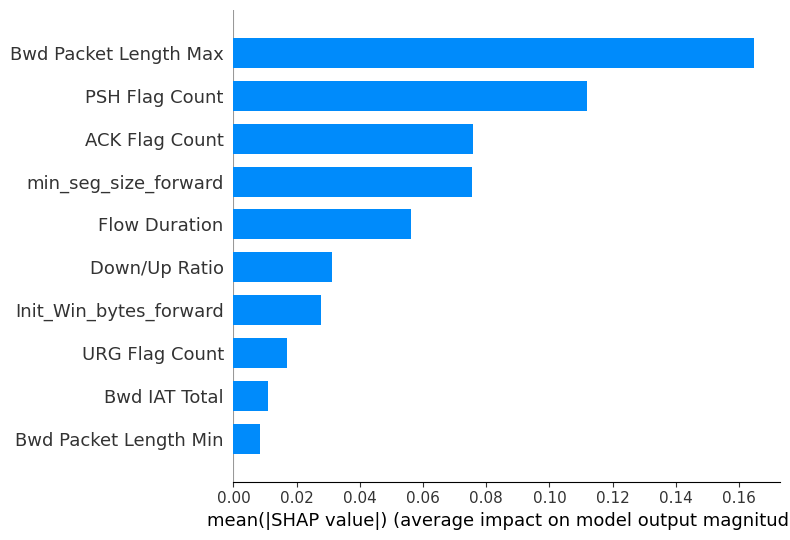


SHAP Analysis for SVM:


100%|██████████| 50/50 [00:52<00:00,  1.05s/it]


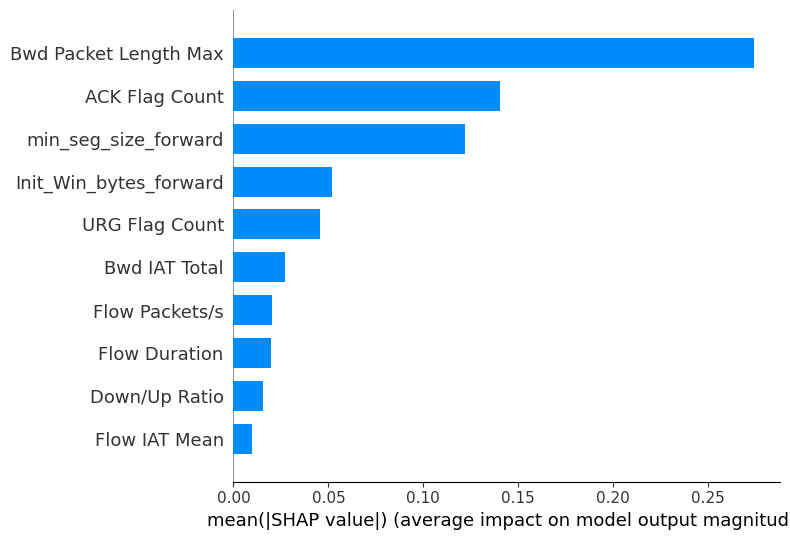


SHAP Analysis for LR:


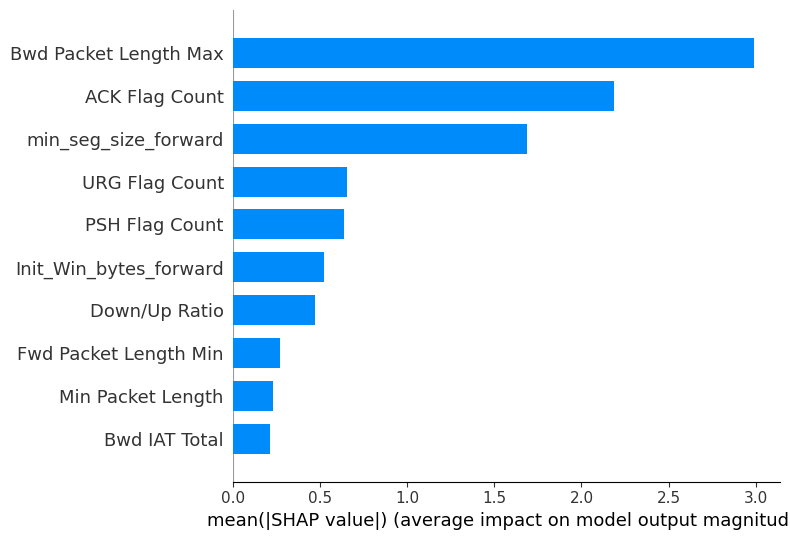

c:\Users\phani\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\phani\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



SHAP Analysis for LGB:


c:\Users\phani\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\explainers\_tree.py:448: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn('LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray')


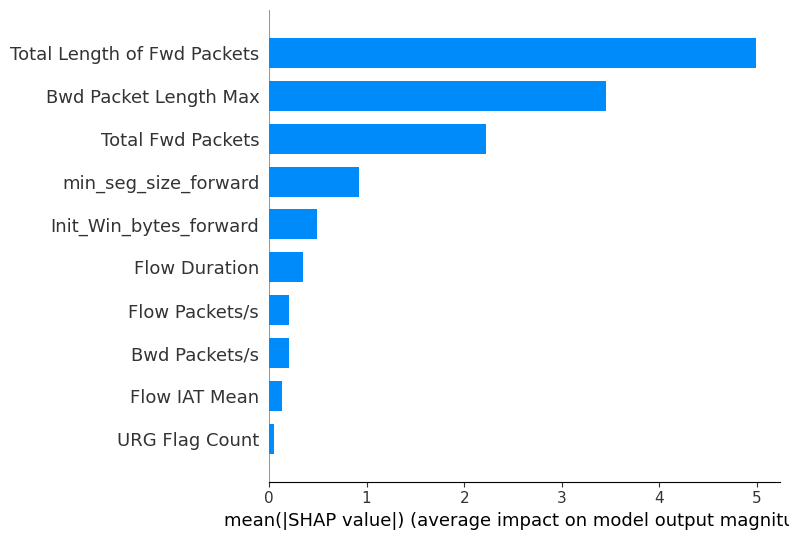

44/44 [==============================] - 1s 12ms/step

SHAP Analysis for LTSM:
2/2 [==============================] - 0s 11ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

3282/3282 [==============================] - 41s 12ms/step


  2%|▏         | 1/50 [00:45<37:33, 45.99s/it]

3282/3282 [==============================] - 44s 13ms/step


  4%|▍         | 2/50 [01:34<37:46, 47.22s/it]

3282/3282 [==============================] - 46s 14ms/step


  6%|▌         | 3/50 [02:24<38:11, 48.75s/it]

3282/3282 [==============================] - 43s 13ms/step


  8%|▊         | 4/50 [03:11<36:50, 48.05s/it]

3282/3282 [==============================] - 40s 12ms/step


 10%|█         | 5/50 [03:55<35:00, 46.68s/it]

3282/3282 [==============================] - 40s 12ms/step


 12%|█▏        | 6/50 [04:39<33:28, 45.64s/it]

3282/3282 [==============================] - 43s 13ms/step


 14%|█▍        | 7/50 [05:26<32:58, 46.00s/it]

3282/3282 [==============================] - 49s 15ms/step


 16%|█▌        | 8/50 [06:20<33:58, 48.53s/it]

3282/3282 [==============================] - 44s 13ms/step


 18%|█▊        | 9/50 [07:08<33:05, 48.42s/it]

3282/3282 [==============================] - 42s 13ms/step


 20%|██        | 10/50 [07:54<31:51, 47.79s/it]

3282/3282 [==============================] - 39s 12ms/step


 22%|██▏       | 11/50 [08:37<30:05, 46.31s/it]

3282/3282 [==============================] - 39s 12ms/step


 24%|██▍       | 12/50 [09:20<28:44, 45.37s/it]

3282/3282 [==============================] - 39s 12ms/step


 26%|██▌       | 13/50 [10:03<27:32, 44.67s/it]

3282/3282 [==============================] - 39s 12ms/step


 28%|██▊       | 14/50 [10:47<26:32, 44.23s/it]

3282/3282 [==============================] - 39s 12ms/step


 30%|███       | 15/50 [11:32<25:54, 44.42s/it]

3282/3282 [==============================] - 41s 12ms/step


 32%|███▏      | 16/50 [12:16<25:13, 44.52s/it]

3282/3282 [==============================] - 39s 12ms/step


 34%|███▍      | 17/50 [12:59<24:15, 44.09s/it]

3282/3282 [==============================] - 39s 12ms/step


 36%|███▌      | 18/50 [13:43<23:22, 43.83s/it]

3282/3282 [==============================] - 39s 12ms/step


 38%|███▊      | 19/50 [14:26<22:31, 43.60s/it]

3282/3282 [==============================] - 40s 12ms/step


 40%|████      | 20/50 [15:10<21:51, 43.71s/it]

3282/3282 [==============================] - 39s 12ms/step


 42%|████▏     | 21/50 [15:53<21:00, 43.47s/it]

3282/3282 [==============================] - 44s 13ms/step


 44%|████▍     | 22/50 [16:41<20:59, 44.97s/it]

3282/3282 [==============================] - 45s 14ms/step


 46%|████▌     | 23/50 [17:30<20:48, 46.25s/it]

3282/3282 [==============================] - 43s 13ms/step


 48%|████▊     | 24/50 [18:19<20:20, 46.95s/it]

3282/3282 [==============================] - 49s 15ms/step


 50%|█████     | 25/50 [19:12<20:16, 48.67s/it]

3282/3282 [==============================] - 45s 14ms/step


 52%|█████▏    | 26/50 [20:00<19:27, 48.63s/it]

3282/3282 [==============================] - 44s 13ms/step


 54%|█████▍    | 27/50 [20:48<18:34, 48.47s/it]

3282/3282 [==============================] - 44s 13ms/step


 56%|█████▌    | 28/50 [21:36<17:42, 48.28s/it]

3282/3282 [==============================] - 44s 13ms/step


 58%|█████▊    | 29/50 [22:24<16:49, 48.06s/it]

3282/3282 [==============================] - 41s 13ms/step


 60%|██████    | 30/50 [23:09<15:44, 47.21s/it]

3282/3282 [==============================] - 41s 12ms/step


 62%|██████▏   | 31/50 [23:54<14:42, 46.46s/it]

3282/3282 [==============================] - 40s 12ms/step


 64%|██████▍   | 32/50 [24:37<13:41, 45.63s/it]

3282/3282 [==============================] - 39s 12ms/step


 66%|██████▌   | 33/50 [25:20<12:41, 44.77s/it]

3282/3282 [==============================] - 40s 12ms/step


 68%|██████▊   | 34/50 [26:04<11:51, 44.46s/it]

3282/3282 [==============================] - 39s 12ms/step


 70%|███████   | 35/50 [26:48<11:04, 44.30s/it]

3282/3282 [==============================] - 41s 12ms/step


 72%|███████▏  | 36/50 [27:33<10:25, 44.68s/it]

3282/3282 [==============================] - 41s 12ms/step


 74%|███████▍  | 37/50 [28:18<09:40, 44.64s/it]

3282/3282 [==============================] - 41s 13ms/step


 76%|███████▌  | 38/50 [29:03<08:57, 44.82s/it]

3282/3282 [==============================] - 41s 13ms/step


 78%|███████▊  | 39/50 [29:48<08:14, 44.98s/it]

3282/3282 [==============================] - 41s 12ms/step


 80%|████████  | 40/50 [30:33<07:28, 44.89s/it]

3282/3282 [==============================] - 41s 12ms/step


 82%|████████▏ | 41/50 [31:18<06:44, 44.90s/it]

3282/3282 [==============================] - 40s 12ms/step


 84%|████████▍ | 42/50 [32:03<05:58, 44.81s/it]

3282/3282 [==============================] - 42s 13ms/step


 86%|████████▌ | 43/50 [32:48<05:15, 45.05s/it]

3282/3282 [==============================] - 41s 13ms/step


 88%|████████▊ | 44/50 [33:34<04:31, 45.18s/it]

3282/3282 [==============================] - 41s 12ms/step


 90%|█████████ | 45/50 [34:18<03:45, 45.00s/it]

3282/3282 [==============================] - 43s 13ms/step


 92%|█████████▏| 46/50 [35:05<03:02, 45.62s/it]

3282/3282 [==============================] - 40s 12ms/step


 94%|█████████▍| 47/50 [35:49<02:15, 45.14s/it]

3282/3282 [==============================] - 40s 12ms/step


 96%|█████████▌| 48/50 [36:33<01:29, 44.84s/it]

3282/3282 [==============================] - 40s 12ms/step


 98%|█████████▊| 49/50 [37:16<00:44, 44.13s/it]

3282/3282 [==============================] - 31s 10ms/step


100%|██████████| 50/50 [37:50<00:00, 45.41s/it]


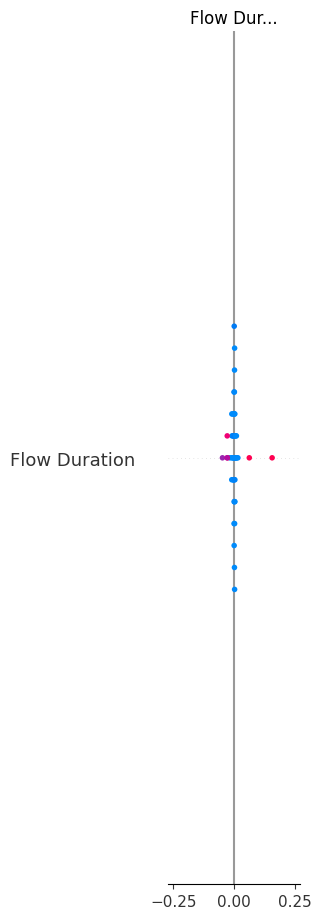

Model Performance:
RF: Accuracy = 0.88
KNN: Accuracy = 0.98
SVM: Accuracy = 0.97
LR: Accuracy = 0.97
LGB: Accuracy = 0.97
LTSM: Accuracy = 0.90


In [55]:
import shap
import pickle
import numpy as np
from sklearn.metrics import accuracy_score

# Load and evaluate models
model_paths = {
    "RF": "model/rf_model.pkl",
    "KNN": "model/KNN_model.pkl",
    "SVM": "model/svm_model.pkl",
    "LR": "model/log_reg_model.pkl",
    "LGB": "model/lgb_model.pkl",
    
    "LTSM": "model/LTSM_model.pkl"
}

accuracy_scores = {}

for model_name, model_path in model_paths.items():
    with open(model_path, 'rb') as file:
        model = pickle.load(file)

    # Predict probabilities and labels
    if hasattr(model, "decision_function"):  # For SVM or similar models
        y_probs = model.decision_function(X_val_scaled)
        y_preds = model.predict(X_val_scaled)
    elif hasattr(model, "predict_proba"):  # For models like Logistic Regression
        y_probs = model.predict_proba(X_val_scaled)[:, 1]
        y_preds = model.predict(X_val_scaled)
    elif hasattr(model, "predict"):  # For Keras Sequential or similar models
        y_probs = model.predict(X_val_scaled).ravel()  # Ensure 1D array
        y_preds = (y_probs > 0.5).astype(int)  # Threshold for binary classification
    else:
        raise AttributeError(f"{model_name} does not support prediction methods.")

    # Compute metrics
    accuracy = accuracy_score(Y_val, y_preds)
    accuracy_scores[model_name] = accuracy

    # SHAP explainability
    print(f"\nSHAP Analysis for {model_name}:")
    explainer = None
    if model_name in ["RF", "LGB"]:  # Tree-based models
        explainer = shap.TreeExplainer(model)
    elif model_name == "LR":  # Logistic Regression or similar
        explainer = shap.LinearExplainer(model, X_val_scaled)
    elif model_name == "CNN":  # SHAP DeepExplainer for Neural Networks
        background = X_val_scaled[:100]  # Select a subset for background
        explainer = shap.DeepExplainer(model, background)
    else:  # SHAP KernelExplainer for SVM, KNN, etc.
        subset = shap.sample(X_val_scaled, 50)  # Reduce dataset size for SHAP
        explainer = shap.KernelExplainer(model.predict, subset)

    # Compute SHAP values for the first 50 samples (optimize for speed)
    shap_values = explainer.shap_values(X_val_scaled[:50])
    shap.summary_plot(
        shap_values, X_val_scaled[:50], plot_type="bar", feature_names=validation_data.columns[:-1], max_display=10
    )

# Print model performance
print("Model Performance:")
for model_name, acc in accuracy_scores.items():
    print(f"{model_name}: Accuracy = {acc:.2f}")


In [56]:
from tensorflow.keras.models import load_model

# Save the Keras/TensorFlow CNN model using the .h5 format
cnn_model.save("model/CNN_model.h5")
print("Model saved as 'CNN_model.h5'.")
lstm_model.save("model/LTSM.h5")
print("Model saved as 'LTSM.h5'.")


Model saved as 'CNN_model.h5'.
Model saved as 'LTSM.h5'.


c:\Users\phani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


X_val_scaled shape: (1400, 27, 1)
44/44 [==============================] - 0s 3ms/step

SHAP Analysis for CNN:


c:\Users\phani\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
c:\Users\phani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Raw SHAP values shape: (100, 27, 1, 1)
Final SHAP values shape: (100, 27, 1)
Flattened X_val_scaled shape: (100, 27)


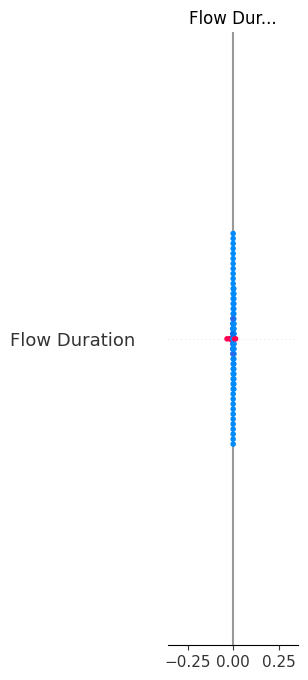

In [58]:
import shap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# --- Data Preparation ---
# Assume X_val is defined
scaler = MinMaxScaler()
X_val_scaled = scaler.fit_transform(X_val)
X_val_scaled = X_val_scaled.reshape(-1, X_val_scaled.shape[1], 1)
print("X_val_scaled shape:", X_val_scaled.shape)  # Expect (N, 27, 1)

# --- Load the Model ---
cnn_model_path = "model/CNN_model.h5"
cnn_model = load_model(cnn_model_path)

# --- Make Predictions (if needed) ---
y_probs = cnn_model.predict(X_val_scaled).ravel()
y_preds = (y_probs > 0.5).astype(int)

# --- SHAP Analysis Using DeepExplainer ---
print("\nSHAP Analysis for CNN:")

# Use a subset for the background. Try a smaller background if needed.
background = X_val_scaled[:10]  # Try with 10 samples
explainer = shap.DeepExplainer(cnn_model, background)

# Compute SHAP values for the first 100 samples
# (If your dataset has fewer than 100 samples, adjust accordingly)
shap_values = explainer.shap_values(X_val_scaled[:100])

# If shap_values is a list (common in classification), take the first element.
if isinstance(shap_values, list):
    shap_vals = np.array(shap_values[0])
else:
    shap_vals = np.array(shap_values)

print("Raw SHAP values shape:", shap_vals.shape)
# Expected shape: (100, 27, 1) ideally.
# If you see (27, 1, 1), then the sample axis is missing.
if shap_vals.shape[0] != X_val_scaled[:100].shape[0]:
    # Workaround: tile the values along the sample axis.
    num_samples = X_val_scaled[:100].shape[0]
    shap_vals = np.tile(shap_vals, (num_samples, 1, 1))
    print("Tiled SHAP values shape:", shap_vals.shape)

# Squeeze the last dimension (so shape becomes (samples, features))
shap_vals = np.squeeze(shap_vals, axis=-1)
print("Final SHAP values shape:", shap_vals.shape)  # Should be (100, 27)

# Prepare the feature matrix for plotting:
X_val_scaled_flat = X_val_scaled[:100].reshape(100, -1)
print("Flattened X_val_scaled shape:", X_val_scaled_flat.shape)  # (100, 27)

# --- SHAP Summary Plot ---
# Ensure that 'validation_data' is defined and its columns (except target) match your features.
shap.summary_plot(
    shap_vals, 
    X_val_scaled_flat, 
    plot_type="bar", 
    feature_names=validation_data.columns[:-1]
)


X_val_scaled shape: (1400, 27, 1)

Processing model: CNN
44/44 [==============================] - 0s 3ms/step
Running SHAP analysis...


c:\Users\phani\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
c:\Users\phani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Raw SHAP values shape for CNN: (100, 27, 1, 1)
Final SHAP values shape for CNN: (100, 27, 1, 1)
Flattened X_val_scaled shape: (100, 27)
Plotting SHAP summary for CNN...


TypeError: only length-1 arrays can be converted to Python scalars

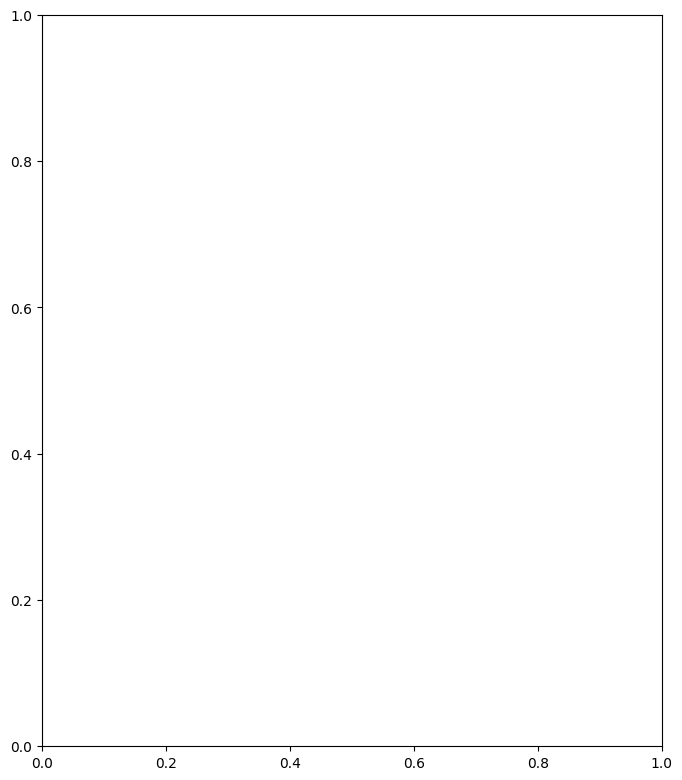

In [57]:
import shap
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model

# ------------------------------
# Data Preparation
# ------------------------------
# Assume X_val is already defined (e.g., as a NumPy array or Pandas DataFrame without the target column)
scaler = MinMaxScaler()
X_val_scaled = scaler.fit_transform(X_val)

# Reshape to 3D if your deep models expect (samples, features, channels)
# For example, for a CNN you might have (samples, 27, 1)
X_val_scaled = X_val_scaled.reshape(-1, X_val_scaled.shape[1], 1)
print("X_val_scaled shape:", X_val_scaled.shape)

# ------------------------------
# Define Model Paths
# ------------------------------
model_paths = {
    "CNN": "model/CNN_model.h5",
    "LSTM": "model/LSTM_model.h5"
}

# ------------------------------
# Loop over models and perform SHAP analysis
# ------------------------------
for model_name, model_path in model_paths.items():
    print(f"\nProcessing model: {model_name}")
    
    # Load the model using load_model
    model = load_model(model_path)
    
    # Make predictions (if needed)
    y_probs = model.predict(X_val_scaled).ravel()  # 1D probabilities
    y_preds = (y_probs > 0.5).astype(int)
    
    # ------------------------------
    # SHAP Analysis using DeepExplainer
    # ------------------------------
    print("Running SHAP analysis...")
    # Use a small subset of the data as the background for the explainer
    background = X_val_scaled[:10]
    explainer = shap.DeepExplainer(model, background)
    
    # Compute SHAP values for a subset of the data (e.g. first 100 samples)
    shap_values = explainer.shap_values(X_val_scaled[:100])
    
    # For many Keras models, DeepExplainer returns a list (one element per output).
    # Here we assume a single-output model and take the first element.
    if isinstance(shap_values, list):
        shap_vals = np.array(shap_values[0])
    else:
        shap_vals = np.array(shap_values)
    
    print(f"Raw SHAP values shape for {model_name}: {shap_vals.shape}")
    
    # If the number of samples in the SHAP output is not matching the input samples,
    # you might need to tile or adjust the dimensions.
    expected_samples = X_val_scaled[:100].shape[0]
    if shap_vals.shape[0] != expected_samples:
        # For example, if shap_vals comes out as (27, 1, 1) instead of (100, 27, 1),
        # we tile the values along a new sample axis.
        shap_vals = np.tile(shap_vals, (expected_samples, 1, 1))
        print("Tiled SHAP values shape:", shap_vals.shape)
    
    # Squeeze the last singleton dimension if it exists so that we end up with (samples, features)
    if shap_vals.ndim == 3 and shap_vals.shape[-1] == 1:
        shap_vals = np.squeeze(shap_vals, axis=-1)
    print(f"Final SHAP values shape for {model_name}: {shap_vals.shape}")
    
    # Flatten the input features for plotting (remove the channel dimension)
    X_val_scaled_flat = X_val_scaled[:100].reshape(expected_samples, -1)
    print("Flattened X_val_scaled shape:", X_val_scaled_flat.shape)
    
    # ------------------------------
    # Plot SHAP Summary
    # ------------------------------
    # Ensure that validation_data (if using for feature names) is defined.
    # Here we assume that validation_data.columns[:-1] gives you a list of feature names.
    print(f"Plotting SHAP summary for {model_name}...")
    shap.summary_plot(
        shap_vals,
        X_val_scaled_flat,
        plot_type="bar",
        feature_names=validation_data.columns[:-1]  # Adjust as needed for your data
    )


X_val_scaled shape: (1400, 27, 1)
44/44 [==============================] - 0s 3ms/step

SHAP Analysis for CNN:


c:\Users\phani\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
c:\Users\phani\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


Raw SHAP values shape: (100, 27, 1, 1)
Final SHAP values shape: (100, 27, 1)
Flattened X_val_scaled shape: (100, 27)


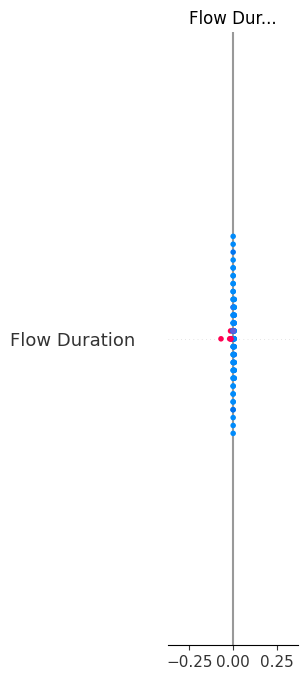

# Anomaly Detection

In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100, contamination="auto", random_state=42)
isolation_forest.fit(X_train_scaled)

# Predict anomalies on the test data (-1 = anomaly, 1 = normal)
y_pred_test = isolation_forest.predict(X_test_scaled)

# Map predictions to match Y_test format:
# -1 (anomaly) -> 1 (attack), 1 (normal) -> 0 (benign)
y_pred_test_mapped = np.where(y_pred_test == 0, 1, 0)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred_test_mapped))

print("\nClassification Report:")
print(classification_report(Y_test, y_pred_test_mapped))

print("Accuracy Score:", accuracy_score(Y_test, y_pred_test_mapped))

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score, confusion_matrix, silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Features to use based on SHAP analysis
selected_features = [
    'Bwd Packet Length Max', 
    'ACK Flag Count', 
    'min_seg_size_forward', 
    'Init_Win_bytes_forward', 
    'Down/Up Ratio', 
    'URG Flag Count', 
    'PSH Flag Count'
]

# Subset and scale the data
X_train_selected = X_train_scaled[:, [list(validation_data.columns).index(feature) for feature in selected_features]]
scaler = StandardScaler()
X_train_selected = scaler.fit_transform(X_train_selected)

# Function to visualize DBSCAN results for parameter tuning
def dbscan_clustering_analysis(X_train_selected, Y_train, eps_values, min_samples_values):
    best_ari = -1
    best_params = None
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            # Apply DBSCAN with current parameters
            dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
            dbscan_labels = dbscan.fit_predict(X_train_selected)

            # Calculate Adjusted Rand Index (ARI)
            ari_score = adjusted_rand_score(Y_train, dbscan_labels)
            silhouette_avg = silhouette_score(X_train_selected, dbscan_labels)

            # Update best ARI score and parameters
            if ari_score > best_ari:
                best_ari = ari_score
                best_params = (eps, min_samples)

            print(f"DBSCAN (eps={eps}, min_samples={min_samples}):")
            print(f"  ARI: {ari_score:.3f}, Silhouette Score: {silhouette_avg:.3f}")
            print(f"  Noise points: {list(dbscan_labels).count(-1)}\n")

    print(f"Best ARI: {best_ari:.3f} with parameters (eps={best_params[0]}, min_samples={best_params[1]})")
    return best_params, best_ari

# Tuning parameters
eps_values = [0.2, 0.3, 0.5, 0.7, 1.0]
min_samples_values = [3, 5, 7, 10]

# Perform DBSCAN parameter tuning and get the best parameters
best_params, best_ari = dbscan_clustering_analysis(X_train_selected, Y_train, eps_values, min_samples_values)

# Run DBSCAN with the best parameters
eps, min_samples = best_params
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
dbscan_labels = dbscan.fit_predict(X_train_selected)

# Final clustering evaluation
print(f"\nFinal DBSCAN Results (eps={eps}, min_samples={min_samples}):")
print(f"  Adjusted Rand Index (ARI): {best_ari:.3f}")
print(f"  Noise points: {list(dbscan_labels).count(-1)}")

# Plot confusion matrix
def plot_confusion_matrix(Y_train, dbscan_labels):
    confusion = confusion_matrix(Y_train, dbscan_labels)
    sns.heatmap(confusion, annot=True, fmt="d", cmap="YlGnBu")
    plt.title("Confusion Matrix Heatmap")
    plt.xlabel("Predicted Clusters")
    plt.ylabel("True Labels")
    plt.show()

plot_confusion_matrix(Y_train, dbscan_labels)


In [ ]:
Y_test_aligned = Y_test[:len(dbscan_anomaly_labels)]


In [ ]:
dbscan_labels = DBSCAN(eps=0.3, min_samples=7).fit_predict(X_train_scaled[:len(Y_test)])


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Ensure consistent length between Y_test and clustering labels
if len(Y_test) != len(dbscan_anomaly_labels):
    print(f"Mismatch detected: Y_test has {len(Y_test)} samples, dbscan_anomaly_labels has {len(dbscan_anomaly_labels)} samples.")
    Y_test_aligned = Y_test[:len(dbscan_anomaly_labels)]  # Align lengths
else:
    Y_test_aligned = Y_test

# Step 1: Map clusters to binary anomaly labels
# Noise (-1) is treated as anomaly (1), and all other clusters are normal (0)
dbscan_anomaly_labels = (dbscan_labels == -1).astype(int)  # 1 for anomaly, 0 for normal

# Step 2: Evaluate metrics against true labels (Y_test_aligned)
print("Confusion Matrix:")
conf_matrix = confusion_matrix(Y_test_aligned, dbscan_anomaly_labels)
print(conf_matrix)

print("\nClassification Report:")
class_report = classification_report(Y_test_aligned, dbscan_anomaly_labels, target_names=["Normal", "Anomaly"])
print(class_report)

# Step 3: Compute overall accuracy
accuracy = accuracy_score(Y_test_aligned, dbscan_anomaly_labels)
print(f"Overall Accuracy: {accuracy:.3f}")
